#Aviation Analysis Project

Problem: The problem statement is that Local business people are planning to purchase and operate airplanes for commercial and private enterprises, but do not know anything about the potential risks of aircraft.

The goal: The goal is create a data analysis project that can be able to create visualizations based on the data given to allow the business people to choose an aircraft that provides low risk.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##Importing the CSV file

In [3]:
df = pd.read_csv('AviationData.csv', encoding='latin1')

<ipython-input-3-226953176827>:1: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('AviationData.csv', encoding='latin1')


The data is from Kaggle which provides details about the aviation sector.

In [4]:
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


From the information above, the dataset contains 25 columns and has NAN values which are missing values.

In [5]:
df.tail()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88888,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


Describing the dataset by the statistics

In [6]:
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


Getting the information from the dataset to find the number of entries, and the value types of the columns and size

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

## Handling the missing values
In this section, missing values will be handled by:
 1. Identifying the number of missing values in each column.
 2. calculating the percentage of NAN values for each column.
 3. Dropping columns.
 4. Imputing missing values by using statistical methods.
 5. Dropping rows that contain missing values.


###Identifying the number of missing values.

In [8]:
#identifying the number of missing values
df.isnull().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38757
Airport.Name              36185
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1382
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6384
Publication.Date          13771
dtype: i

In [9]:
df.shape

(88889, 31)

###Calculating the percentage of NAN values for each column

In [10]:
#calculate the percentage of NAN values for each column
rows = len(df)
missing = df.isna().sum()
percentage_missing = missing / rows

In [11]:
# Put the data in a DataFrame and sort it
percentage_missing_df = pd.DataFrame({'Missing' : percentage_missing})
percentage_missing_df.sort_values('Missing', ascending = False, inplace = True)

In [12]:
#printing columns with more than 10% missing values
print(percentage_missing_df[percentage_missing_df['Missing'] > 0.1])

                         Missing
Schedule                0.858453
Air.carrier             0.812710
FAR.Description         0.639742
Aircraft.Category       0.636772
Longitude               0.613304
Latitude                0.613203
Airport.Code            0.436016
Airport.Name            0.407081
Broad.phase.of.flight   0.305606
Publication.Date        0.154924
Total.Serious.Injuries  0.140737
Total.Minor.Injuries    0.134246
Total.Fatal.Injuries    0.128261


###Dropping Columns

In [13]:
# Drop columns with over 50% missing values
cols_to_drop = list(percentage_missing_df[percentage_missing_df['Missing'] > 0.5].index)
df.drop(columns = cols_to_drop, axis = 1, inplace = True)
print(cols_to_drop)

['Schedule', 'Air.carrier', 'FAR.Description', 'Aircraft.Category', 'Longitude', 'Latitude']


In [14]:
#show the columns remaining after dropping columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Airport.Code            50132 non-null  object 
 7   Airport.Name            52704 non-null  object 
 8   Injury.Severity         87889 non-null  object 
 9   Aircraft.damage         85695 non-null  object 
 10  Registration.Number     87507 non-null  object 
 11  Make                    88826 non-null  object 
 12  Model                   88797 non-null  object 
 13  Amateur.Built           88787 non-null  object 
 14  Number.of.Engines       82805 non-null

In [15]:
df.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Airport.Code              38757
Airport.Name              36185
Injury.Severity            1000
Aircraft.damage            3194
Registration.Number        1382
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
Purpose.of.flight          6192
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6384
Publication.Date          13771
dtype: int64

###Statistical methods to fill in missing values

In [16]:
#using mean and median to fill in continuous data with missing values
df['Number.of.Engines'] = df['Number.of.Engines'].fillna(df['Number.of.Engines'].median())
df['Total.Fatal.Injuries'] = df['Total.Fatal.Injuries'].fillna(df['Total.Fatal.Injuries'].median())
df['Total.Serious.Injuries'] = df['Total.Serious.Injuries'].fillna(df['Total.Serious.Injuries'].median())
df['Total.Minor.Injuries'] = df['Total.Minor.Injuries'].fillna(df['Total.Minor.Injuries'].median())
df['Total.Uninjured'] = df['Total.Uninjured'].fillna(df['Total.Uninjured'].median())




In [17]:
df.isna().sum() #check the imputed missing values

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Airport.Code              38757
Airport.Name              36185
Injury.Severity            1000
Aircraft.damage            3194
Registration.Number        1382
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines             0
Engine.Type                7096
Purpose.of.flight          6192
Total.Fatal.Injuries          0
Total.Serious.Injuries        0
Total.Minor.Injuries          0
Total.Uninjured               0
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6384
Publication.Date          13771
dtype: int64

In [18]:
#using mode to fill in categorical data with missing values
df['Location'] = df['Location'].fillna(df['Location'].mode()[0])
df['Country'] = df['Country'].fillna(df['Country'].mode()[0])
df['Airport.Name'] = df['Airport.Name'].fillna(df['Airport.Name'].mode()[0])
df['Weather.Condition'] = df['Weather.Condition'].fillna(df['Weather.Condition'].mode()[0])
df['Registration.Number'] = df['Registration.Number'].fillna(df['Registration.Number'].mode()[0])
df['Make'] = df['Make'].fillna(df['Make'].mode()[0])
df['Model'] = df['Model'].fillna(df['Model'].mode()[0])
df['Amateur.Built'] = df['Amateur.Built'].fillna(df['Amateur.Built'].mode()[0])
df['Engine.Type'] = df['Engine.Type'].fillna(df['Engine.Type'].mode()[0])
df['Purpose.of.flight'] = df['Purpose.of.flight'].fillna(df['Purpose.of.flight'].mode()[0])
df['Broad.phase.of.flight'] = df['Broad.phase.of.flight'].fillna(df['Broad.phase.of.flight'].mode()[0])


In [19]:
df.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                      0
Country                       0
Airport.Code              38757
Airport.Name                  0
Injury.Severity            1000
Aircraft.damage            3194
Registration.Number           0
Make                          0
Model                         0
Amateur.Built                 0
Number.of.Engines             0
Engine.Type                   0
Purpose.of.flight             0
Total.Fatal.Injuries          0
Total.Serious.Injuries        0
Total.Minor.Injuries          0
Total.Uninjured               0
Weather.Condition             0
Broad.phase.of.flight         0
Report.Status              6384
Publication.Date          13771
dtype: int64

###Dropping Rows

In [20]:
#dropping rows with missing values in columns
df = df.dropna(subset=['Injury.Severity'])
df = df.dropna(subset=['Aircraft.damage'])
df = df.dropna(subset=['Report.Status'])
df = df.dropna(subset=['Publication.Date'])
df = df.dropna(subset=['Airport.Code'])





In [21]:
df.isna().sum() #check the imputed missing values

Event.Id                  0
Investigation.Type        0
Accident.Number           0
Event.Date                0
Location                  0
Country                   0
Airport.Code              0
Airport.Name              0
Injury.Severity           0
Aircraft.damage           0
Registration.Number       0
Make                      0
Model                     0
Amateur.Built             0
Number.of.Engines         0
Engine.Type               0
Purpose.of.flight         0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Broad.phase.of.flight     0
Report.Status             0
Publication.Date          0
dtype: int64

In [22]:
df.shape

(40445, 25)

In [23]:
df['Make']

8                   Cessna
9           North American
13                  Cessna
18                  Cessna
20                  Cessna
               ...        
88639               CESSNA
88647               CESSNA
88661                BEECH
88735    STEPHEN J HOFFMAN
88767             LUSCOMBE
Name: Make, Length: 40445, dtype: object

##2. Aspect of visualization
This is to show how each column correlates with each other.


The main goal in this section is to identify different models of aircrafts and how many accidents they have been in, causes of the accidents and the number of injuries impacted on the passengers based on the different types of aircrafts.

###1. To show different Aircrafts makes and their models and get the number of accidents made by the different models of the different the different makes of aircrafts

In [24]:
def aircrafts_make(data): #create a function that fetches the data from df
    top_makes = data['Make'].value_counts().head(20).index  #define a variable that shows the top makes of the aircraft

    for make in top_makes:
        top_models = data[data['Make'] == make]['Model'].value_counts().head(10) #define variable top_models to find which make is equal to its model
        #Create a bar graph to show the top models of the aircraft make
        top_models.plot(kind='bar', title=f'Top 10 Models for {make} Aircraft in Accidents')
        plt.xlabel('Model')
        plt.ylabel('Number of Accidents')
        plt.show()

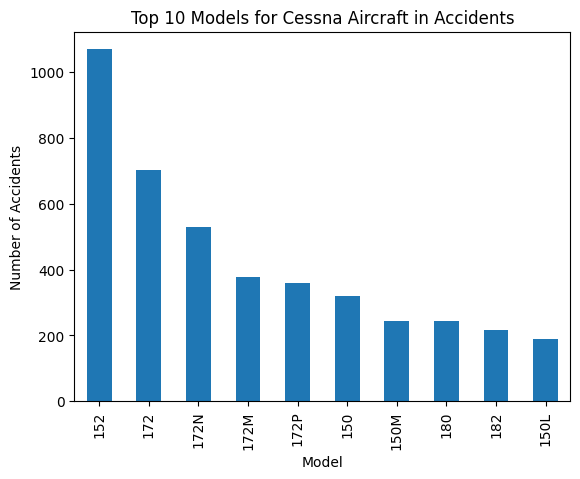

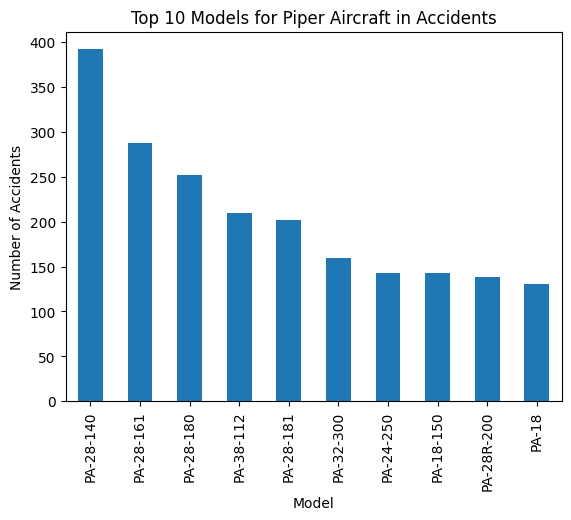

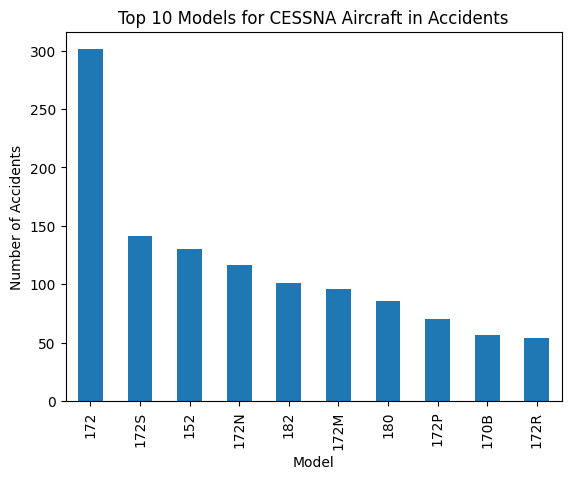

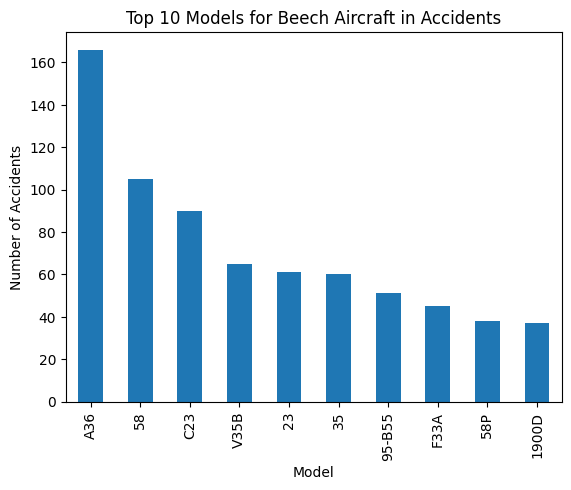

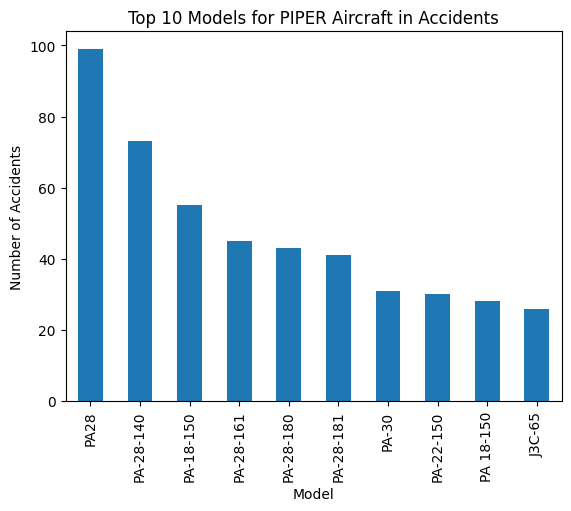

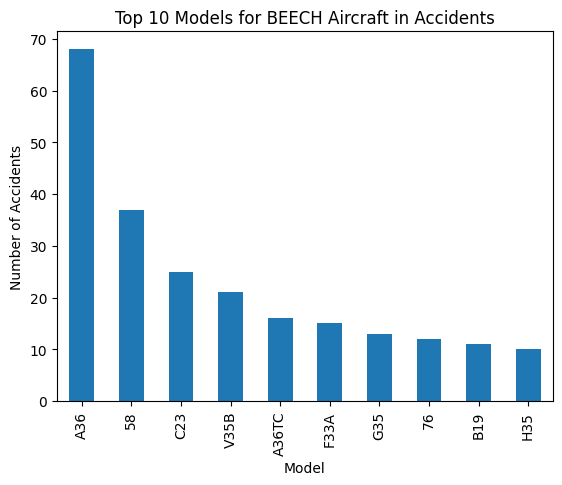

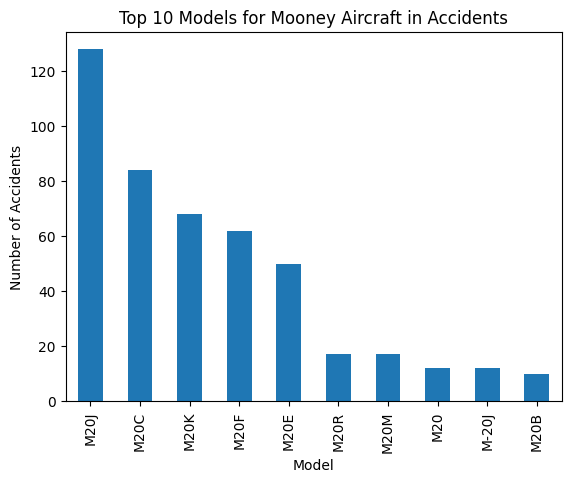

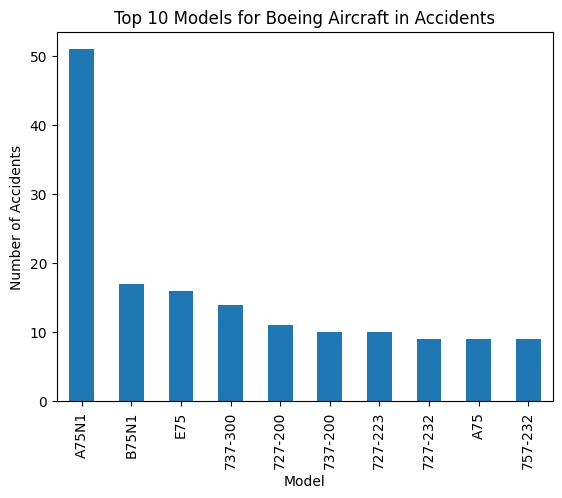

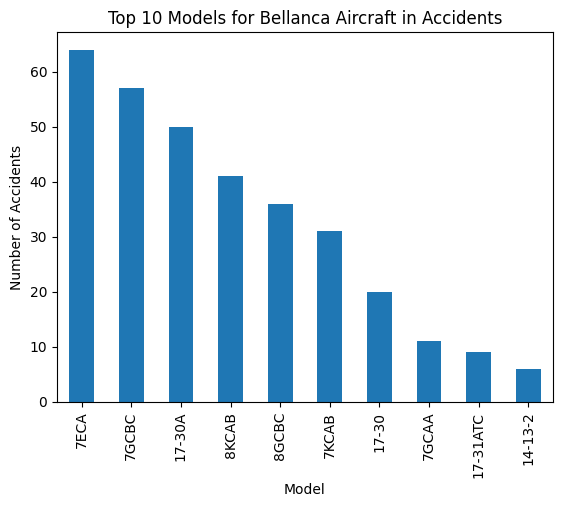

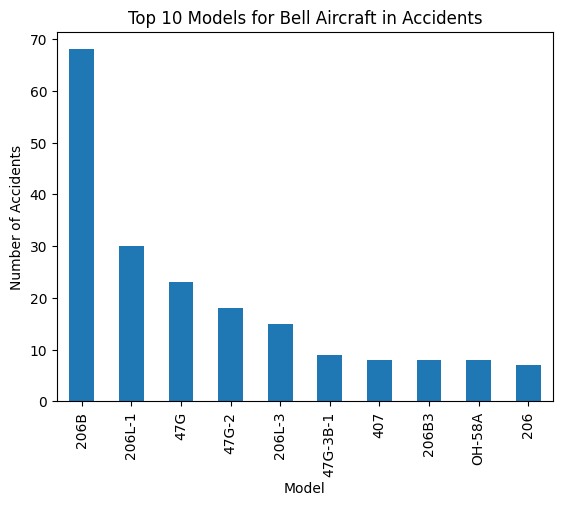

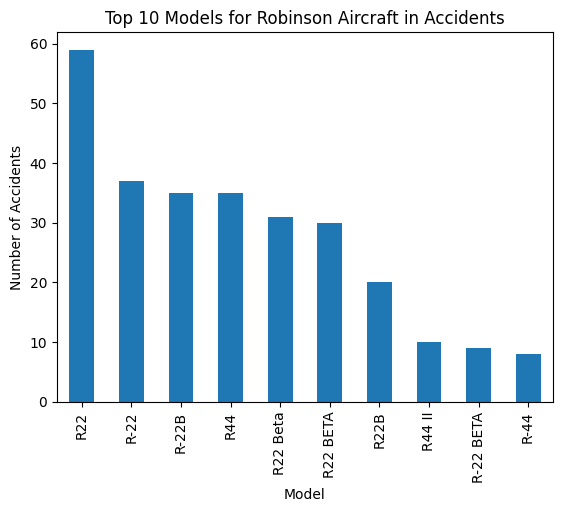

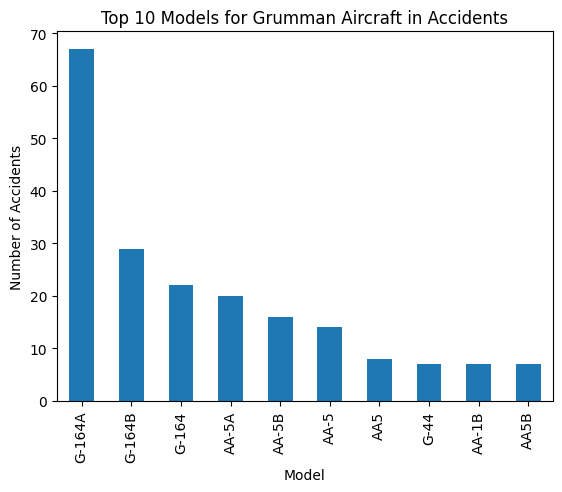

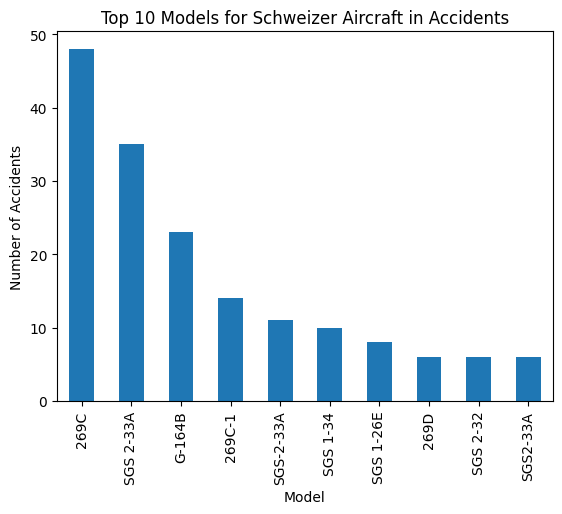

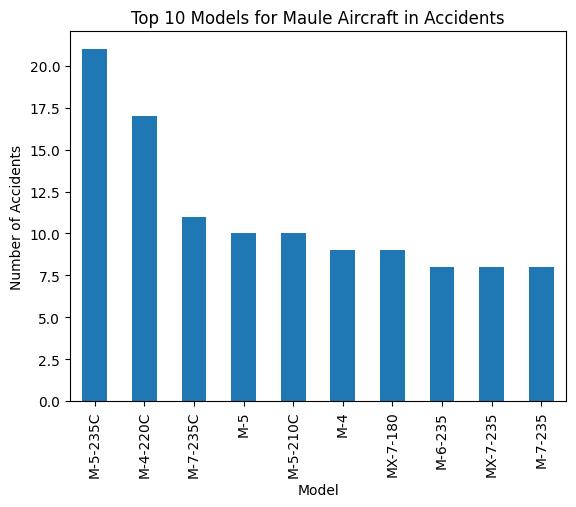

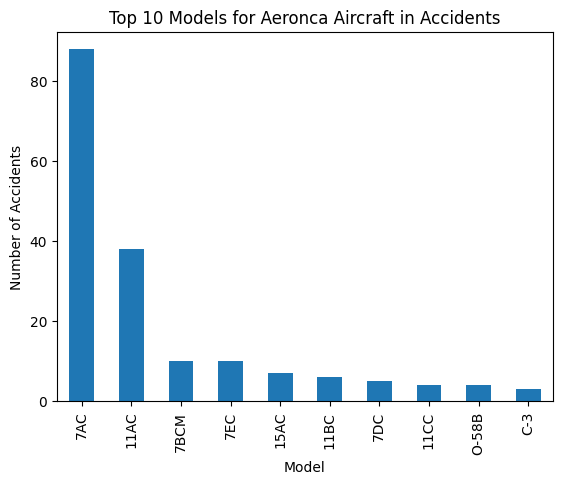

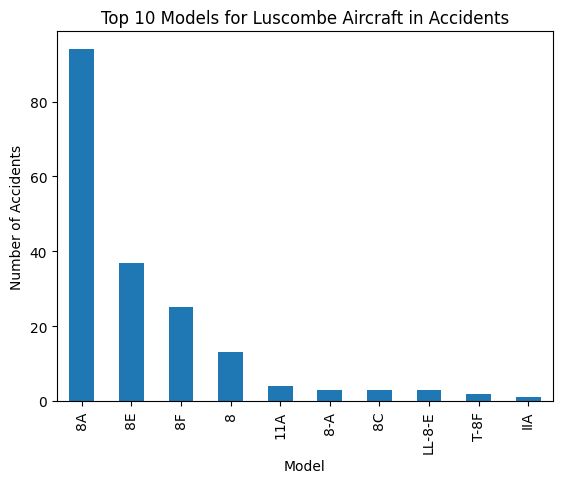

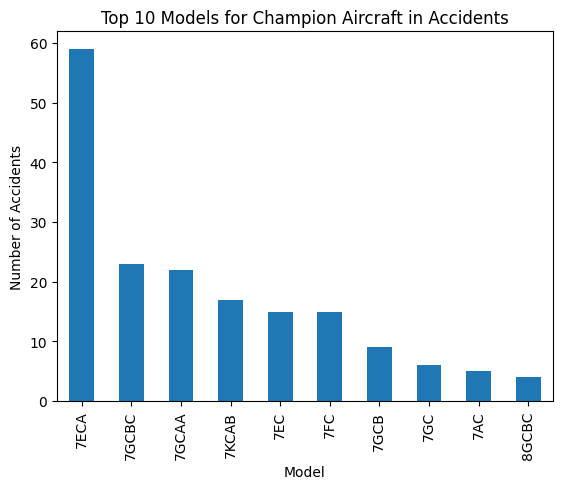

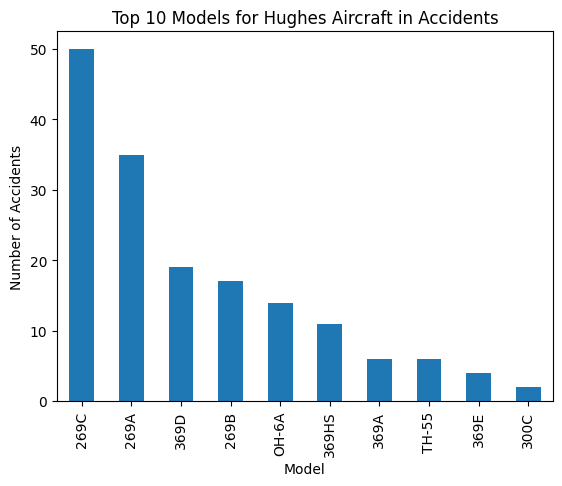

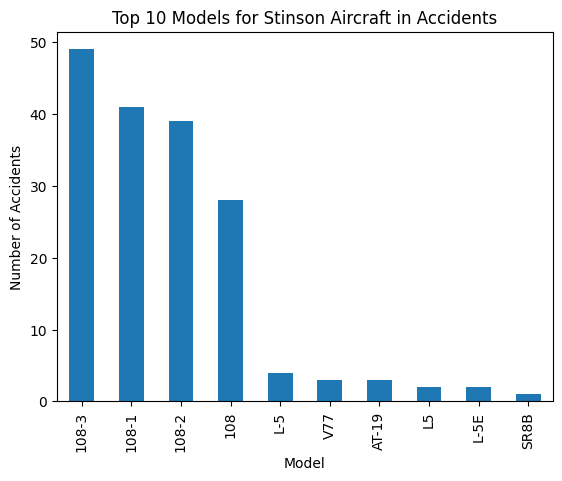

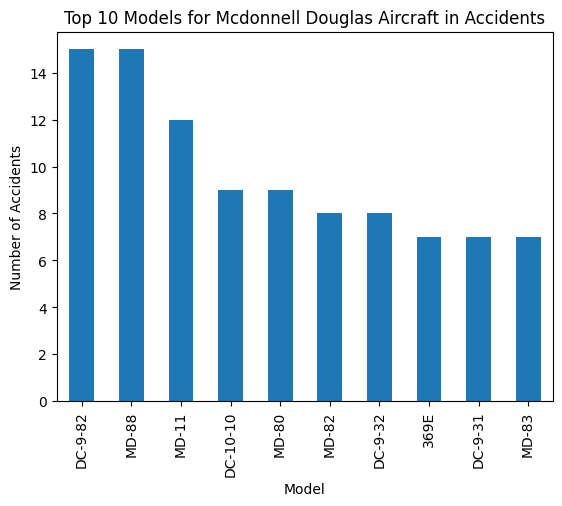

In [25]:
aircrafts_make(df)

###2. Visualize which weather conditions causes the most accidents

In [26]:
def air_weather(data):
  weather_count = data['Weather.Condition'].value_counts()
  weather_count.plot(kind='bar', title='Weather Conitions for Number of Accidents')
  plt.xlabel('Weather Conditions')
  plt.ylabel('Number of Accidents')
  plt.show()

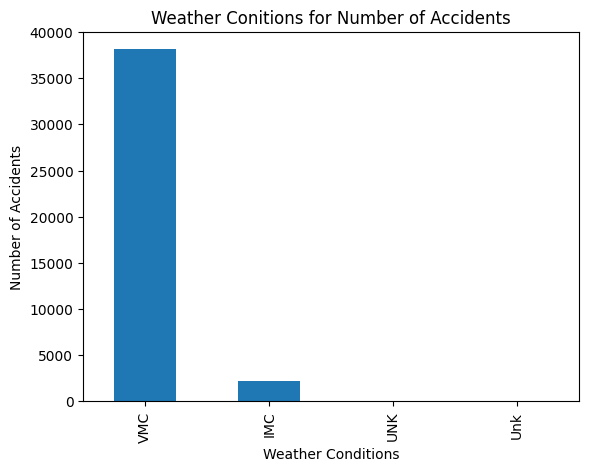

In [27]:
air_weather(df)

### 3. Visualize the categories of accidents caused by different aircrafts makes



In [29]:
#Defining a variable to get the top 10 makes of the aircrafts
makes = df['Make'].value_counts().nlargest(10)
makes.index

Index(['Cessna', 'Piper', 'CESSNA', 'Beech', 'PIPER', 'BEECH', 'Mooney',
       'Boeing', 'Bellanca', 'Bell'],
      dtype='object', name='Make')

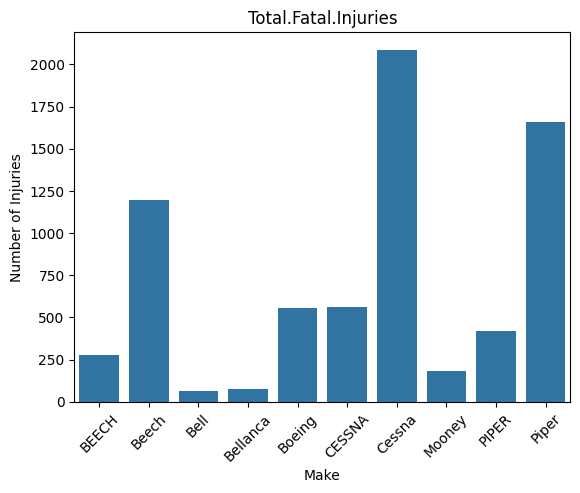

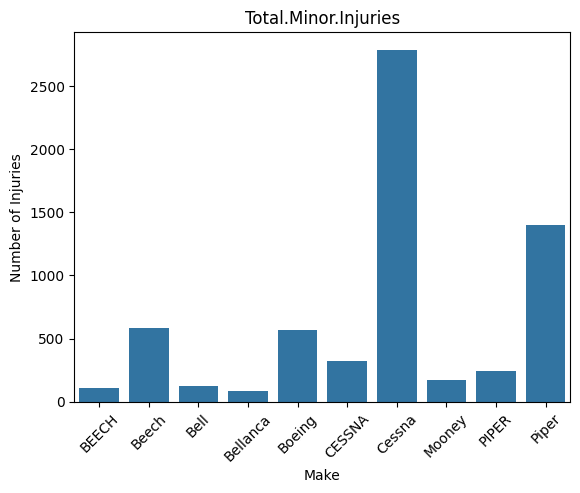

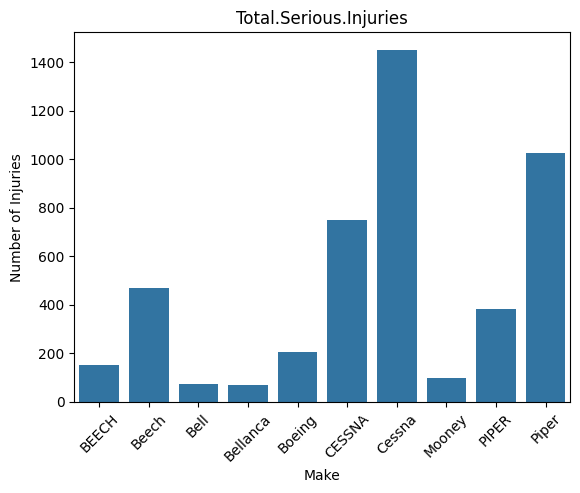

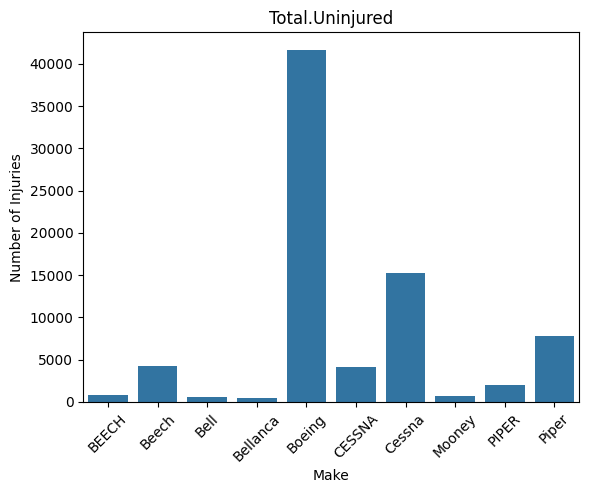

In [35]:

# Define a list of injury types
injuries = ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']

# Select the rows where the column Make is in the top 10 models, and select the Make column and the injury columns
top_injuries = df.loc[df['Make'].isin(makes.index), ['Make'] + injuries]

# Pivot the data so that the column Make is the index, and the injury types are columns
inj_pivot = top_injuries.pivot_table(index='Make', values=injuries, aggfunc='sum')

# Loop over each injury type
for injury in inj_pivot:
    # Create a bar plot of the injury type vs the column Make
    sns.barplot(x=inj_pivot.index, y=inj_pivot[injury])
    # Rotate the x-axis labels by 45 degrees for easier reading
    plt.xticks(rotation=45)
    #generates different injuries
    plt.title(injury)
    plt.xlabel('Make')
    plt.ylabel('Number of Injuries')
    plt.show()


In [40]:
#create a new csv file
df.to_csv('new_aviation_data.csv', index=False)